In [61]:
import pickle 
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
def load_pickle(filename):
    with open (filename, "rb") as handle:
        return pickle.load(handle)
    
file_directory = "../output/data/"
prefix = "tokenized_"

train_data = load_pickle(file_directory+prefix+"train_data.pkl") 

In [13]:
train_data["q1_length"] = train_data["question1"].apply(lambda question: len(str(question)))
train_data["q2_length"] = train_data["question2"].apply(lambda question: len(str(question)))
train_data["diff_length"] = train_data["q1_length"] - train_data["q2_length"]

582264


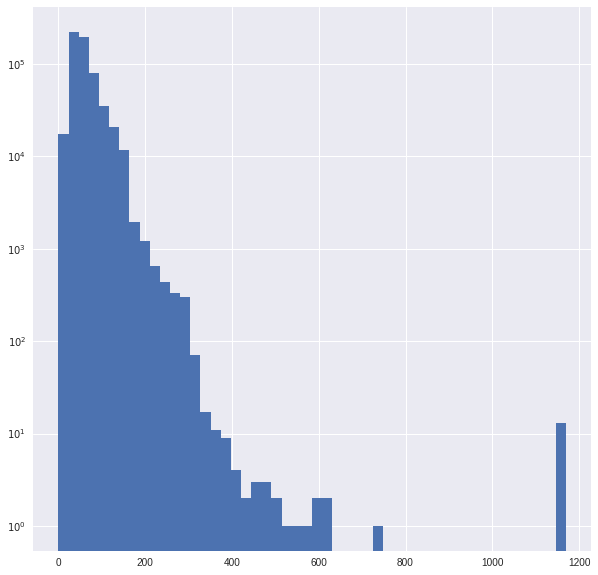

In [71]:
all_lengths = np.concatenate((train_data["q1_length"].values, train_data["q2_length"].values))

print len(all_lengths)
plt.figure(figsize=(10, 10))
plt.hist(all_lengths, bins=50)
plt.yscale('log')
plt.show()
#plt.title('Label distribution over word_match_share', fontsize=15)
#plt.xlabel('word_match_share', fontsize=15)




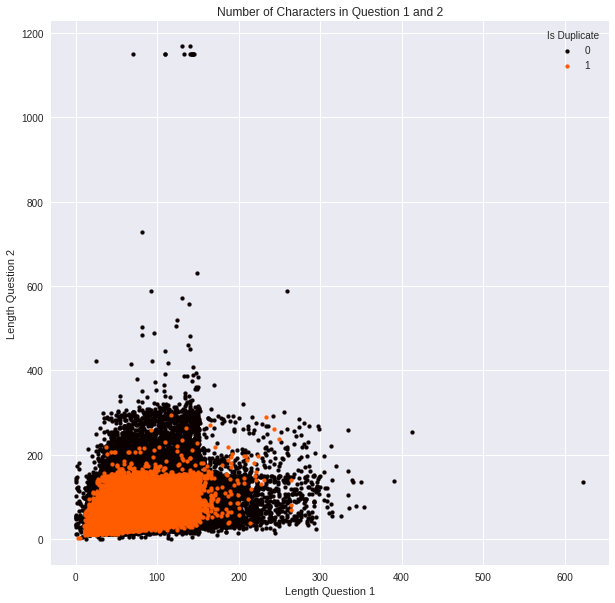

In [77]:
# Credit: https://stackoverflow.com/questions/28033046/matplotlib-scatter-color-by-categorical-factors/28033497



import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

fig = plt.figure(figsize=(10, 10))

#Scatter of Petal
x=train_data["q1_length"]
y=train_data["q2_length"]

# Get unique names of species
uniq = list(set(train_data['is_duplicate']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = train_data['is_duplicate'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('Length Question 1')
plt.ylabel('Length Question 2')
plt.title('Number of Characters in Question 1 and 2')
plt.legend(loc='upper right', title="Is Duplicate")
plt.savefig("../output/figures/len_q12_scatter.png")
plt.show()
